In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
CityData = pd.read_csv(city_data_to_load)
RideData = pd.read_csv(ride_data_to_load)

# Display the data table for preview
RideData.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
#Validating Ride Data.
RGroup = RideData.groupby(['city']+['date']+['fare']+['ride_id'])
a = int(len(RGroup))
b = int(len(RideData))

if a==b:
    print('no need to consolidate Ride Data')
else:
    RideData = RideData.drop.duplicates()
#Validating City Data.
c = CityData['city'].nunique()
d = CityData['city'].count()

if c==d:
    print('no need to consolidate City Data')
else:
    CGroup = CityData.groupby(['city']+['type'])
    CityData = CGroup['driver_count'].sum()
    CityData = CityData.reset_index()
    e = CityData['city'].count()
    print ('City Data consolidated from '+str(d)+' to ' +str(e))


no need to consolidate Ride Data
no need to consolidate City Data


In [7]:
# Combine the data into a single dataset
CityRide = pd.merge(RideData,CityData,how='left',on='city')
CityRide.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [8]:
# calculate
GCityRide = CityRide.groupby(['city']+['type']+['driver_count'])

Ave_Fare = GCityRide['fare'].mean()

Total_Rides = GCityRide['ride_id'].count()

df = pd.DataFrame({"AveFare":Ave_Fare, "TotalRides":Total_Rides})
df = df.reset_index()

## Bubble Plot of Ride Sharing Data

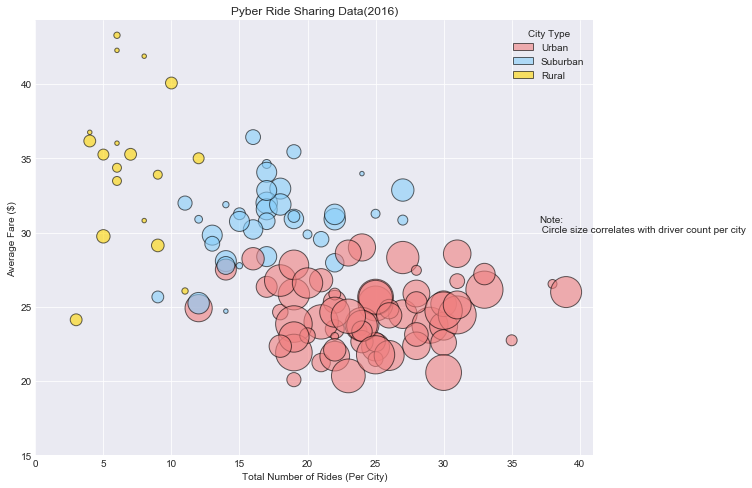

In [21]:
# use the scatter function
colors = {'Urban':'lightcoral', 'Suburban':'lightskyblue', 'Rural':'gold'}

#update legend
import matplotlib.patches as mpatches

U = mpatches.Circle((0.5, 0.5), 0.1, facecolor="lightcoral",alpha=.6,edgecolor="black",linewidth=1)
S = mpatches.Circle((0.5, 0.5), 0.1, facecolor="lightskyblue",alpha=.6,edgecolor="black", linewidth=1)
R = mpatches.Circle((0.5, 0.5), 0.1, facecolor="gold",alpha=.6,edgecolor="black", linewidth=1)

#Draw Bubble Chart
sns.set_style("darkgrid") 
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df['TotalRides'], df['AveFare'], s=df['driver_count']*20, c=df['type'].apply(lambda x:colors[x]),alpha=.6, linewidth=1, edgecolor='black')
ax.legend([U,S,R],["Urban","Suburban","Rural"],title= 'City Type')

 # Set x and y limits
ax.set_xlim(0, max(df['TotalRides'])+2)
ax.set_ylim(15, max(df['AveFare'])+1)
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.set_title("Pyber Ride Sharing Data(2016)")
ax.text(37,30,'Note:\n Circle size correlates with driver count per city')

plt.savefig('/bubbleplotridingdata.png')
plt.show()

## Total Fares by City Type

In [14]:
# calculate variables that will be used in the Pie Chart
GType = CityRide.groupby(['type'])
GGType = CityData.groupby(['type'])

# Calculate Total fare($) Per CityType
TFare = GType['fare'].sum()

# Calculate Total Rides Per CityType
TRides = GType['ride_id'].count()

# Calculate Total Drivers Per CityType
TDrivers = GGType['driver_count'].sum()

df1 = pd.DataFrame({"TotalFare":TFare, "TotalRides":TRides, "TotalDrivers":TDrivers})
df1 = df1.reset_index()
df1


,type,TotalFare,TotalRides,TotalDrivers
0,Rural,4327.93,125,78
1,Suburban,19356.33,625,490
2,Urban,39854.38,1625,2405


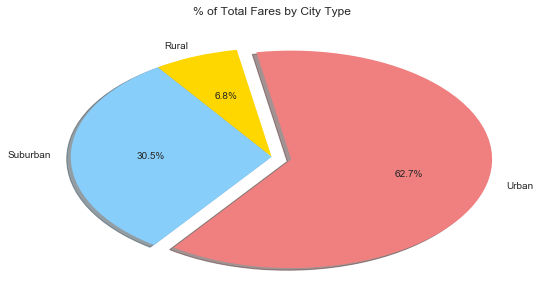

In [20]:
# Plot % of Fares by City Type
# Labels for the sections of our pie chart
labels = df1['type']

# The values of each section of the pie chart
sizes = df1['TotalFare']

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Creates the pie chart based upon the values above
# update graph size 
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=100)
            
# Update Title
plt.title("% of Total Fares by City Type")
# Prints our pie chart to the screen
plt.savefig('/totalfares_pie1.png')
plt.show()

## Total Rides by City Type

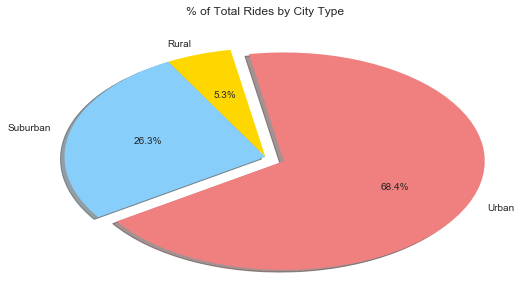

In [19]:
# Plot % of Total Rides by City Type
# Labels for the sections of our pie chart
labels = df1['type']

# The values of each section of the pie chart
sizes = df1['TotalRides']

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Creates the pie chart based upon the values above
# update graph size 
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=100)
            
# Update Title
plt.title("% of Total Rides by City Type")
# Prints our pie chart to the screen
plt.savefig('/totalridesbycitytype_pie2.png')
plt.show()

## Total Drivers by City Type

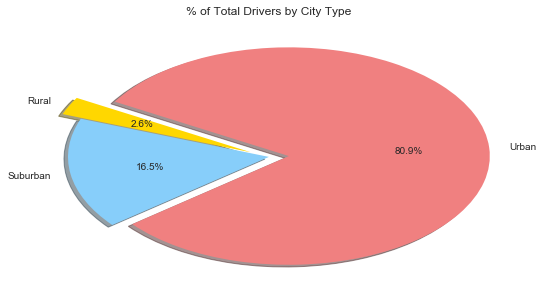

<Figure size 432x288 with 0 Axes>

In [18]:
# Plot % of Total Drivers by City Type
# Labels for the sections of our pie chart
labels = df1['type']

# The values of each section of the pie chart
sizes = df1['TotalDrivers']

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0.1)

# Creates the pie chart based upon the values above 
# update graph size 
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=150)
            
# Update Title
plt.title("% of Total Drivers by City Type")
# Prints our pie chart to the screen
plt.show()
plt.savefig('/totaldrivers_pie3.png')
plt.show()

Analysis: 
1. Urban area has the most riders, drivers, and fares 

2. Rural area has the less riders and drivers, however, the total fares % is around 6.7% which is more than expected proportionally(riders =5.3%, riders=3.1%). This indicates that, the demand for drivers is higher and thus may cause riders more money to have a ride in the rural area per trip. (distance might be another possible factor that cause the higher fee) The scatter plot also support the same idea 
3. Although Urban area has the most riders and rivers, but the average fares are fairly low. This could be caused by the surplus supplies of drivers (77.85% driver > 68.4% riders from pie chart) and / or possibly shorter ride distance per ride.